In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("D:/Data science/codeclause/country_wise_latest.csv")

In [3]:
data.head(7)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas


In [4]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [14]:
data["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [16]:
data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [19]:
dataframe=data[['WHO Region','Confirmed','Deaths', 'Recovered', 'Active']].groupby('WHO Region').mean().round(2).sort_values(by='Confirmed', ascending=False)

In [20]:
dataframe

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Americas,252551.03,9792.34,127674.74,115083.94
South-East Asia,183529.70,4134.90,115693.30,63701.50
Eastern Mediterranean,67761.09,1742.68,54609.09,11409.32
Europe,58920.05,3770.43,35602.20,19547.43
Western Pacific,18276.75,515.56,12923.12,4838.06
Africa,15066.81,254.65,9180.10,5632.06


In [23]:
perc_list =[]
list1=[]
list2=[]
for i in range(len(dataframe)):
    perc_recovered=round(dataframe['Recovered'][i]*100/dataframe['Confirmed'][i], 2)
    perc_death= round((dataframe['Deaths'][i]*100)/dataframe['Confirmed'][i],2)
    perc_active = round((dataframe['Active'][i]*100)/dataframe['Confirmed'][i],2)
    perc_list.append(perc_recovered)
    list1.append(perc_death)
    list2.append(perc_active)
dataframe['perc_recovered'] =perc_list
dataframe['perc_active']=list2
dataframe['perc_death']= list1

In [25]:
dataframe=dataframe.reset_index()
dataframe

,WHO Region,Confirmed,Deaths,Recovered,Active,perc_recovered,perc_active,perc_death
0,Americas,252551.03,9792.34,127674.74,115083.94,50.55,45.57,3.88
1,South-East Asia,183529.70,4134.90,115693.30,63701.50,63.04,34.71,2.25
2,Eastern Mediterranean,67761.09,1742.68,54609.09,11409.32,80.59,16.84,2.57
3,Europe,58920.05,3770.43,35602.20,19547.43,60.42,33.18,6.40
4,Western Pacific,18276.75,515.56,12923.12,4838.06,70.71,26.47,2.82
5,Africa,15066.81,254.65,9180.10,5632.06,60.93,37.38,1.69


In [26]:
data1=dataframe[['WHO Region', 'Confirmed']]
data1

,WHO Region,Confirmed
0,Americas,252551.03
1,South-East Asia,183529.70
2,Eastern Mediterranean,67761.09
3,Europe,58920.05
4,Western Pacific,18276.75
5,Africa,15066.81


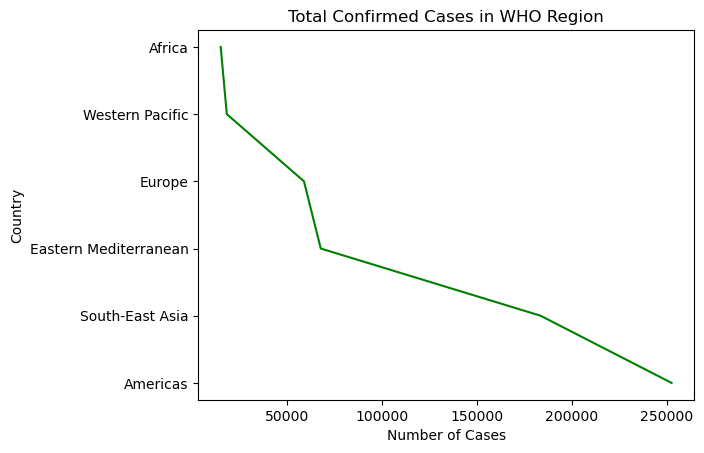

In [78]:
x=data1["Confirmed"]
y=data1["WHO Region"]
plt.plot(x,y,color="green")
plt.xlabel("Number of Cases")
plt.ylabel("Country")
plt.title("Total Confirmed Cases in WHO Region")
plt.show()

In [32]:
data2=dataframe[['WHO Region', 'Deaths']]
data2

,WHO Region,Deaths
0,Americas,9792.34
1,South-East Asia,4134.90
2,Eastern Mediterranean,1742.68
3,Europe,3770.43
4,Western Pacific,515.56
5,Africa,254.65


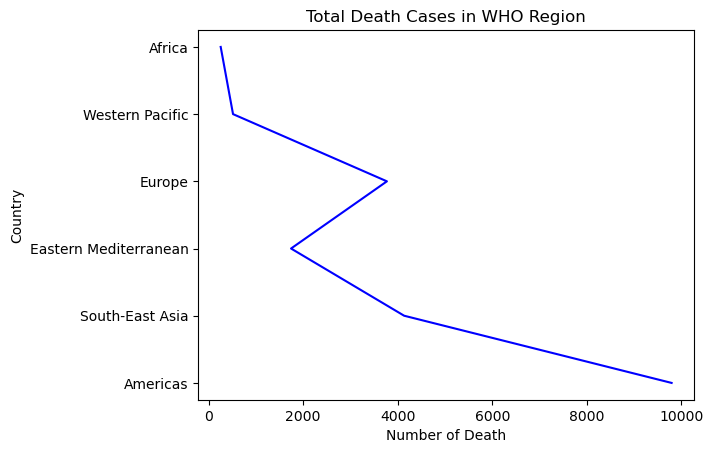

In [58]:
x=data2["Deaths"]
y=data2["WHO Region"]
plt.plot(x,y,color="blue")
plt.xlabel("Number of Death")
plt.ylabel("Country")
plt.title("Total Death Cases in WHO Region")
plt.show()

In [50]:
data3=dataframe[['WHO Region', 'Recovered']]
data3

,WHO Region,Recovered
0,Americas,127674.74
1,South-East Asia,115693.30
2,Eastern Mediterranean,54609.09
3,Europe,35602.20
4,Western Pacific,12923.12
5,Africa,9180.10


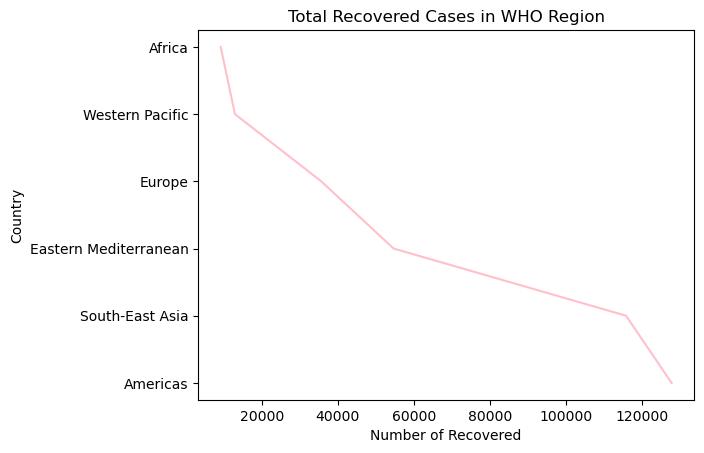

In [59]:
x=data3["Recovered"]
y=data3["WHO Region"]
plt.plot(x,y,color="pink")
plt.xlabel("Number of Recovered")
plt.ylabel("Country")
plt.title("Total Recovered Cases in WHO Region")
plt.show()

In [55]:
data4=dataframe[['WHO Region', 'Active']]
data4

,WHO Region,Active
0,Americas,115083.94
1,South-East Asia,63701.50
2,Eastern Mediterranean,11409.32
3,Europe,19547.43
4,Western Pacific,4838.06
5,Africa,5632.06


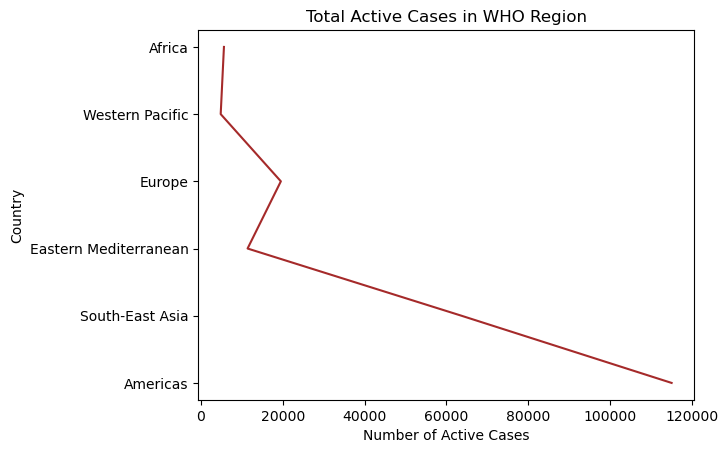

In [60]:
x=data4["Active"]
y=data4["WHO Region"]
plt.plot(x,y,color="brown")
plt.xlabel("Number of Active Cases")
plt.ylabel("Country")
plt.title("Total Active Cases in WHO Region")
plt.show()

In [37]:
frame1=data[['Country/Region', 'Confirmed',]].groupby('Country/Region').mean().round(2).sort_values(by='Confirmed', ascending=True).reset_index()[0:10]

([<matplotlib.patches.Wedge at 0x2a78e0de3b0>,
 [Text(1.084838623483699, 0.18200318952697858, 'Western Sahara'),
  Text(0.9480239914500012, 0.5578982986487844, 'Holy See'),
  Text(0.6271841982755454, 0.903681349499624, 'Greenland'),
  Text(0.10042415908022766, 1.0954063119559927, 'Saint Kitts and Nevis'),
  Text(-0.5180324463785176, 0.9703825969683755, 'Dominica'),
  Text(-0.9910657674599292, 0.4772720865178076, 'Laos'),
  Text(-1.0613261459680041, -0.2891138389712661, 'Grenada'),
  Text(-0.5499999702695119, -0.9526279613277874, 'Timor-Leste'),
  Text(0.29792459678724875, -1.0588866486216337, 'Saint Lucia'),
  Text(0.9910658121453628, -0.47727199372753143, 'Fiji')],
 [Text(0.7889735443517811, 0.13236595601962078, '5.29%'),
  Text(0.689471993781819, 0.4057442171991159, '6.35%'),
  Text(0.4561339623822148, 0.6572227996360902, '7.41%'),
  Text(0.07303575205834738, 0.7966591359679946, '8.99%'),
  Text(-0.37675087009346736, 0.7057327977951822, '9.52%'),
  Text(-0.7207751036072212, 0.3471069

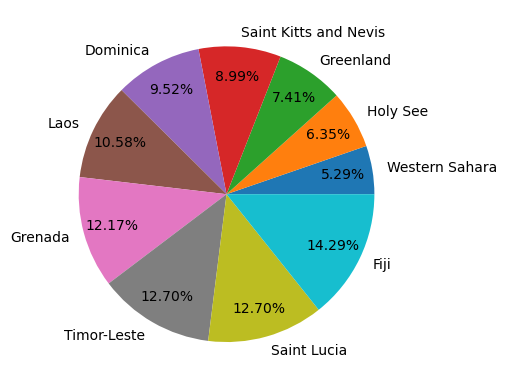

In [38]:
plt.pie(frame1['Confirmed'], labels=frame1['Country/Region'], autopct="%0.2f%%", pctdistance=0.8)

In [39]:
data[['WHO Region', 'Country/Region', 'Confirmed']].groupby(['WHO Region','Country/Region']).mean().round(2).sort_values(by='Confirmed', ascending=False)[0:20]

Confirmed
WHO Region            Country/Region           
Americas              US              4290259.0
                      Brazil          2442375.0
South-East Asia       India           1480073.0
Europe                Russia           816680.0
Africa                South Africa     452529.0
Americas              Mexico           395489.0
                      Peru             389717.0
                      Chile            347923.0
Europe                United Kingdom   301708.0
Eastern Mediterranean Iran             293606.0
                      Pakistan         274289.0
Europe                Spain            272421.0
Eastern Mediterranean Saudi Arabia     268934.0
Americas              Colombia         257101.0
Europe                Italy            246286.0
                      Turkey           227019.0
South-East Asia       Bangladesh       226225.0
Europe                France           220352.0
                      Germany          207112.0
Americas              Argentina        167416.0

Text(0.5, 1.0, 'Country Vs Deaths/100 cases')

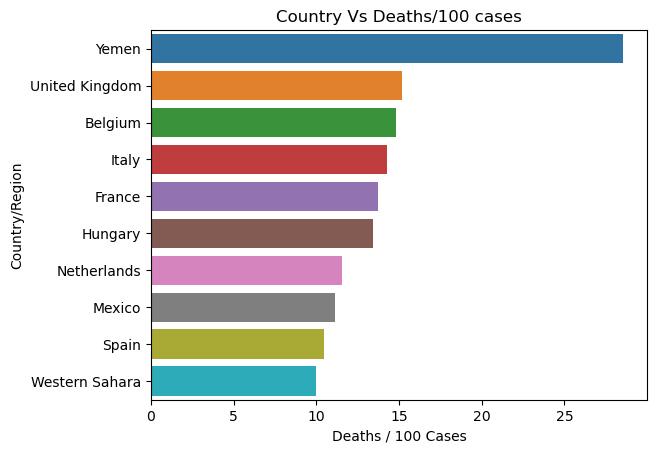

In [62]:
frame= data[['Country/Region', 'Deaths / 100 Cases']].sort_values(by='Deaths / 100 Cases', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='Deaths / 100 Cases', data=frame).set_title("Country Vs Deaths/100 cases")

Text(0.5, 1.0, 'Country Vs Recovered/100 cases')

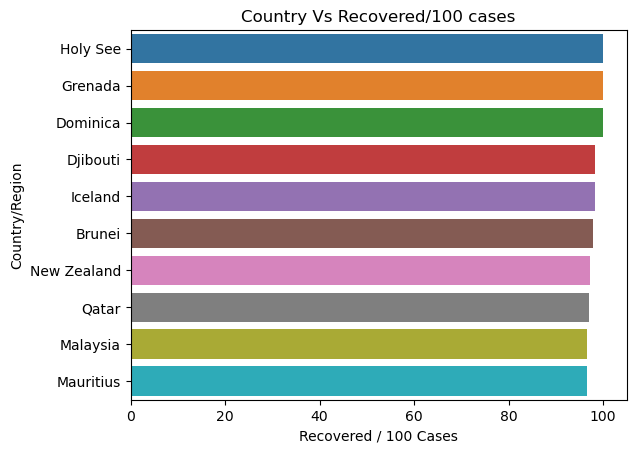

In [63]:
frame= data[['Country/Region', 'Recovered / 100 Cases']].sort_values(by='Recovered / 100 Cases', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='Recovered / 100 Cases', data=frame).set_title("Country Vs Recovered/100 cases")

Text(0.5, 1.0, 'Country Vs New Cases')

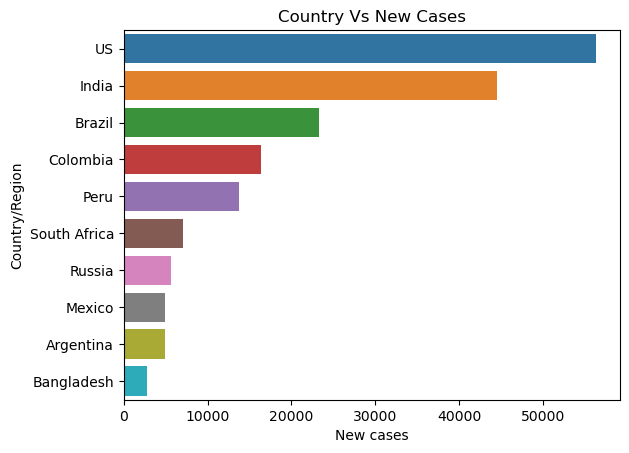

In [64]:
frame= data[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='New cases', data=frame).set_title("Country Vs New Cases")

Text(0.5, 1.0, 'New Deaths')

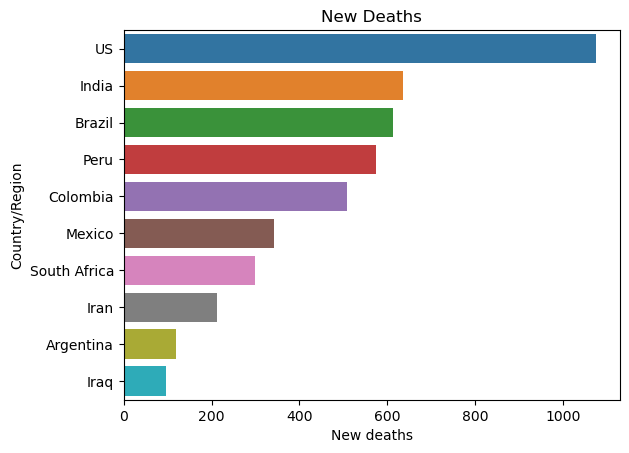

In [65]:
frame= data[['Country/Region', 'New deaths']].sort_values(by='New deaths', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='New deaths', data=frame).set_title("New Deaths")

Text(0.5, 1.0, 'New Recovery')

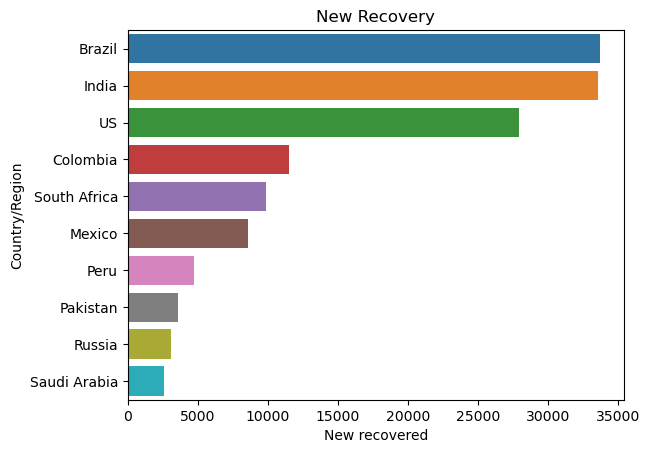

In [66]:
frame= data[['Country/Region', 'New recovered']].sort_values(by='New recovered', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='New recovered', data=frame).set_title("New Recovery")